<img src="https://raw.githubusercontent.com/dvgodoy/PyTorch101_ODSC_Europe2020/master/images/linear_dogs.jpg" height="400" width="800">


# Андан на экономе

## Семинар 2: numpy

In [ ]:
import numpy as np

## Зачем нужен этот пакет?

`numpy` — библиотека, позволяющая удобно работать с многомерными массивами и матрицами, содержащая математические функции. Кроме того, `numpy` позволяет векторизовать многие вычисления и пригождается в анализе данных.

In [ ]:
x = [1, 2, 3]
y = [4, 5, 6]

print(x + y) # списки объединились вмесссте
print(3 * x) # список продублировался трижды
type(x)

[1, 2, 3, 4, 5, 6]
[1, 2, 3, 1, 2, 3, 1, 2, 3]


list

In [ ]:
# тот же принцип, что и для сложения строк - не поэлементно, а просто объединение
'abc'+'def'

'abcdef'

In [ ]:
# если хотим поэлементно - долго и сложно
summing = []
for i in range(len(x)):
    summing.append(x[i]+y[i])
summing

[5, 7, 9]

In [ ]:
# а в numpy - быстро и в одну строку
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

print(x + y) # в случае numpy поэлементное сложение
print(3 * x) # каждый элемент умножился на число
type(x)

[5 7 9]
[3 6 9]


numpy.ndarray

Работает более быстро.

In [ ]:
x = np.arange(10**7)  # для большого массива
x[:10]  # при помощи '[:10]' мы выводим срез первых 10-и значений из массива - чтобы не пришлось все 10 млн выводить!

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.arange(10**7).shape # размер созданного массива 10 млн

(10000000,)

In [ ]:
y = list(x)
y[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
%%timeit
sum(y)

497 ms ± 153 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
np.sum(x) # в среднем, почти в 70 раз быстрее!

7.3 ms ± 514 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


NumPy работает быстро по нескольким причинам:
* Массивы хранятся в непрерывном участке памяти, а все элементы имеют один и тот же тип
* Для вычислений по возможности используются библиотеки линейной алгебры вроде BLAS

# 1. Вектора и матрицы

Посмотрим на основы работы с матрицами и векторами подробнее!

## 1.1 Вектора

Векторно работает не только сложение, но и все другие операции.

In [ ]:
x = np.array([1, -10, 3, 0, 1, 75, 3])
x[3:6] # можно делать срезы по индексам

array([ 0,  1, 75])

In [ ]:
x > 0  # проверять условия

array([ True, False,  True, False,  True,  True,  True])

In [ ]:
x[x > 0]  # выводить элементы массива, удовлетоворяющие условиям

array([ 1,  3,  1, 75,  3])

In [ ]:
y = x-1
x[y > 0]  # условие не обязательно должно быть выставлено для того же массива

array([ 3, 75,  3])

In [ ]:
# составные условия

x[(x > 0) * (x <= 70)] # операция с "и"
x[(x > 0) & (x <= 70)]

x[(x > 0) | (x <= 70)] # операция с "или" - для правил вспоминаем операторы из информатики (например, 1+1=1 и т.д.)
x[(x > 0) + (x <= 70)]

array([1, 3, 1, 3])

In [ ]:
x[[2, 5]]  # хотим вывести несколько элементов с индексами [2, 5] - заметим, что работаем пока в одномерном векторе!

array([ 3, 75])

Есть много сопособов создать в `numpy` вектор. Можно сделать это перечислением элементов, как выше для вектора `x`. А можно с помощью различных специальных функций.

In [ ]:
y = np.arange(start=10, stop=20, step=2) # последнее значение не включается!
y

array([10, 12, 14, 16, 18, 20, 22])

In [ ]:
np.linspace(0,1, 20)  # тут размер шага определяется автоматически

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [ ]:
y = np.ones(5) # вектор длины 5 из единиц
y

array([1., 1., 1., 1., 1.])

In [ ]:
y = np.zeros(shape=4) # вектор длины 4 из нулей
y

array([0., 0., 0., 0.])

In [ ]:
np.random.seed(1)  # фиксируем зерно генерации для воспроизводимости
y = np.random.rand(5)  # случайный вектор, равномерное распределение на [0;1)
y

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01,
       1.46755891e-01])

In [ ]:
y = np.ones_like(x) # вектор из единиц такой же длины как вектор x
y

array([1, 1, 1, ..., 1, 1, 1])

$*$ _на линейную регрессию мы будем смотреть позже на занятиях по математической статистике и на анализе данных. Но для ее решения нам часто надо будет сгенерировать доп вектор из единиц, чтобы можно было найти коэффициент сдвига для линейной функции._

Создание такого вектора нужно, например, если мы хотим решить задачу линейной регрессии для зависимой переменной $y$ и объясняющей переменной $x$ и найти коэффициенты $(\alpha,\beta)$ такие, что $y_i=a+b\cdot x_i$, $i \in \{1,...,n\}$.

 Задачу можно представить также в матричном виде: $Y= X\beta$, где $X=((1,...,1)^T, (x_1,...,x_n)^T)$, $\beta=(a,b)^T$. Вот тут нам и нужно сгенирировать вектор (1,...,1)^T, который мы могли бы добавить к x!

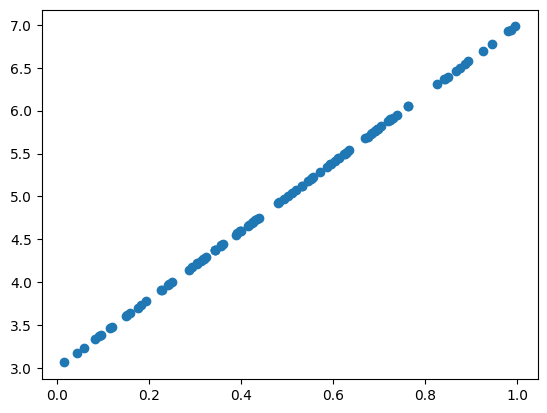

In [ ]:
import matplotlib.pyplot as plt

np.random.seed(123)
x = np.random.rand(100)
a=3
b=4
y = a + x*b
plt.scatter(x,y)
plt.show()

In [ ]:
X = np.concatenate([np.ones_like(x).reshape(-1,1), x.reshape(-1,1)], axis=1)
beta = np.array([[a,b]])

np.sum(X.dot(beta.T) == y.reshape(-1,1))  # видим, что все элементы совпадают, если мы используем матричное умножение вместо стандартных операций
# но что-то мы забежали вперед!

По сути вектор в `numpy` является одномерным массивом, что соответствует интуитивному определению вектора:

In [ ]:
y.shape # размерность вектора

(100,)

In [ ]:
y.reshape(-1,1).shape # размерность !матрицы! - в линале мы все еще считаем ее вектором, но для numpy это не совсем так!

(100, 1)

Более подробно о том, как создавать векторы в `NumPy`,
см. [документацию](http://docs.scipy.org/doc/numpy-1.10.1/user/basics.creation.html).

## 1.2 Матрицы

Можно создать матрицу!

In [ ]:
A = np.array([[1, 2, 3], [2, 5, 6], [6, 7, 4]])
A

array([[1, 2, 3],
       [2, 5, 6],
       [6, 7, 4]])

In [ ]:
A.shape # размерность

(3, 3)

In [ ]:
A[2]    # вторая строка матрицы

array([6, 7, 4])

In [ ]:
A[:,1]  # первый столбец матрицы

array([2, 5, 7])

In [ ]:
A[2][1] # можно срезать сначала строку, потом столбец

7

In [ ]:
A[2,1]  # либос разу обе размерности

7

In [ ]:
A[1:,1:] # можно найти срез

array([[5, 6],
       [7, 4]])

Более подробно о различных способах индексирования в массивах
см. [документацию](http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html).

Булевы массивы позволяют получать элементы, стоящие на тех же местах что и True в булевом массиве (выражение в квадратных скобках):

In [ ]:
A % 2 # также делаем операцию, чтобы потом проверить условие

array([[1, 0, 1],
       [0, 1, 0],
       [0, 1, 0]])

In [ ]:
is_even = A % 2 == 0 # проверяем четность элементов
print(is_even)

[[False  True False]
 [ True False  True]
 [ True False  True]]


In [ ]:
A[is_even] # выводим все подходящие элементы

array([2, 2, 6, 6, 4])

In [ ]:
# то же самое, но в другом виде
np.where(A % 2 == 0)  # номера строк и столбцов

(array([0, 1, 1, 2, 2]), array([1, 0, 2, 0, 2]))

In [ ]:
idx = np.where(A % 2 == 0)
A[idx]

array([2, 2, 6, 6, 4])

Можно создавать специальные матрицы разными функциями, по аналогии с векторами.

In [ ]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [ ]:
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
np.random.normal(size=(3,3))

array([[ 2.08711336,  0.16444123,  1.15020554],
       [-1.26735205,  0.18103513,  1.17786194],
       [-0.33501076,  1.03111446, -1.08456791]])

In [ ]:
np.eye(5) # единичная матрица

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

Можно изменять размерности, если число элементов позволяет это сделать.

In [ ]:
v = np.arange(0, 24, 2)
v

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22])

In [ ]:
v.shape

(12,)

In [ ]:
v.reshape((3, 6)) # n*m должно быть равно количеству элементов в исходной матрице!

ValueError: cannot reshape array of size 12 into shape (3,6)

In [ ]:
v.reshape((3, 2))

ValueError: cannot reshape array of size 12 into shape (3,2)

In [ ]:
v.reshape((3, -1)) # -1 => если возможно, найди размерность второй оси автоматически

array([[ 0,  2,  4,  6],
       [ 8, 10, 12, 14],
       [16, 18, 20, 22]])

In [ ]:
D = np.random.normal(size=(3,3,3))
D.shape

(3, 3, 3)

In [ ]:
D  # Вектор из матриц

array([[[-1.36347154,  0.37940061, -0.37917643],
        [ 0.64205469, -1.97788793,  0.71226464],
        [ 2.59830393, -0.02462598,  0.03414213]],

       [[ 0.17954948, -1.86197571,  0.42614664],
        [-1.60540974, -0.4276796 ,  1.24286955],
        [-0.73521696,  0.50124899,  1.01273905]],

       [[ 0.27874086, -1.37094847, -0.33247528],
        [ 1.95941134, -2.02504576, -0.27578601],
        [-0.55210807,  0.12074736,  0.74821562]]])

Массивы можно объединять:



In [ ]:
A = np.array([[1, 2], [3, 4]])
np.hstack((A, np.zeros(A.shape)))

array([[1., 2., 0., 0.],
       [3., 4., 0., 0.]])

In [ ]:
np.vstack((A, np.zeros(A.shape)))

array([[1., 2.],
       [3., 4.],
       [0., 0.],
       [0., 0.]])

In [ ]:
np.concatenate((A, np.eye(A.shape[1])), axis=1)

array([[1., 2., 1., 0.],
       [3., 4., 0., 1.]])

<img src="https://i.ibb.co/JqsBZBF/matricesconcat.png" style="width: 55vw;">

Более подробно о том, как создавать массивы в `numpy`,
см. [документацию](http://docs.scipy.org/doc/numpy-1.10.1/user/basics.creation.html).

## 1.3 Векторы, вектор-строки и вектор-столбцы

In [ ]:
a = np.array([1, 2, 3])
a

array([1, 2, 3])

In [ ]:
b = np.array([[1], [2], [3]])
b

array([[1],
       [2],
       [3]])

In [ ]:
a.shape

(3,)

In [ ]:
b.shape

(3, 1)

In [ ]:
b.transpose()

array([[1, 2, 3]])

In [ ]:
b.transpose().shape

(1, 3)

In [ ]:
b = b.transpose() # если хотим безвозвратно провести операцию над матрицей
b

array([[1, 2, 3]])

$(A^T)^T=A$

In [ ]:
b.transpose().transpose()

array([[1],
       [2],
       [3]])

__Обратите внимание:__ _вектор_ (одномерный массив) и _вектор-столбец_ или _вектор-строка_ (двумерные массивы) являются различными объектами в `numpy`, хотя математически задают один и тот же объект. В случае одномерного массива кортеж `shape` состоит из одного числа и имеет вид `(n,)`, где `n` — длина вектора. В случае двумерных векторов в `shape` присутствует еще одна размерность, равная единице.

В большинстве случаев неважно, какое представление использовать, потому что часто срабатывает приведение типов. Но некоторые операции не работают для одномерных массивов. Например, транспонирование:

In [ ]:
a.T

array([1, 2, 3])

In [ ]:
b.T

array([[1, 2, 3]])

## 1.4  Умножение матриц и векторов-столбцов

Матрицы можно умножать!

<img src="https://i.ibb.co/xq6tgns/matrixmult.png" style="width: 55vw;">

In [ ]:
A = np.array([[1, 0], [0, 1]])
B = np.array([[4, 1], [2, 2]])
A@B # матричное умножение, как в линале

array([[4, 1],
       [2, 2]])

In [ ]:
np.dot(A, B) # тоже матричное умножение

array([[4, 1],
       [2, 2]])

In [ ]:
A.dot(B) # тоже матричное умножение

array([[4, 1],
       [2, 2]])

Можно и вектора перемножать!

$(1\ \ \ 2)\cdot\left(\begin{matrix}4\ \ \ 1\\2\ \ \ 2\end{matrix}\right)=(8\ \ \ 5)$

In [ ]:
x = np.array([[1, 2]])
x@B

array([[8, 5]])

__Обратите внимание:__ операция __`*`__ производит над матрицами покоординатное умножение, а не матричное!

In [ ]:
A = np.array([[1, 0],
              [0, 1]])

B = np.array([[4, 1],
              [2, 2]])

A * B

array([[4, 0],
       [0, 2]])

<img src="https://i.ibb.co/CtC2RqY/elementwisemult.png" style="width: 55vw;">

In [ ]:
A * B

array([[4, 0],
       [0, 2]])

Базовые арифметические операции над массивами выполняются поэлементно.

In [ ]:
A + B

array([[5, 1],
       [2, 3]])

In [ ]:
print(A.dtype)
print((A * 1.0).dtype)

int64
float64


In [ ]:
A * 1.0 / B  # для того, чтобы мы можгли поделить, нужно перевести матрицу A в объект float

array([[0.25, 0.  ],
       [0.  , 0.5 ]])

In [ ]:
A + 1

array([[2, 1],
       [1, 2]])

In [ ]:
3 * A

array([[3, 0],
       [0, 3]])

In [ ]:
B ** 2 # возведение в степень каждого элемента

array([[16,  1],
       [ 4,  4]])

In [ ]:
B.dot(B) # Возведение матрицы в степень: B^2=(B^T)B

array([[18,  6],
       [12,  6]])

Поскольку операции выполняются поэлементно, операнды бинарных операций должны иметь одинаковый размер. Тем не менее, операция может быть корректно выполнена, если размеры операндов таковы, что они могут быть расширены до одинаковых размеров. Данная возможность называется [broadcasting](http://www.scipy-lectures.org/intro/numpy/operations.html#broadcasting):
![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png)

In [ ]:
B.dot(np.array([3,0]))

array([12,  6])

In [ ]:
B * np.array([3,0]) # а тут мы каждую строку умножаем поэлементно на вектор!

array([[12,  0],
       [ 6,  0]])

In [ ]:
A = np.tile(np.arange(0, 40, 10), (3, 1)).T
A

array([[ 0,  0,  0],
       [10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

In [ ]:
A + np.array([0, 1, 2])

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

## 1.5 Другие операции над матрицами

In [ ]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 10]])
A

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8, 10]])

In [ ]:
A.T  # Транспонирование

array([[ 1,  4,  7],
       [ 2,  5,  8],
       [ 3,  6, 10]])

In [ ]:
np.linalg.det(A) # Определитель

-2.9999999999999996

In [ ]:
np.linalg.matrix_rank(A) # Ранг матрицы

3

In [ ]:
np.diag(A) # главная диагональ

array([ 1,  5, 10])

In [ ]:
B = np.linalg.inv(A) # обратная матрица
B

array([[-0.66666667, -1.33333333,  1.        ],
       [-0.66666667,  3.66666667, -2.        ],
       [ 1.        , -2.        ,  1.        ]])

In [ ]:
A@B # Единичная матрица - в теории

array([[1.00000000e+00, 0.00000000e+00, 1.11022302e-16],
       [0.00000000e+00, 1.00000000e+00, 2.22044605e-16],
       [8.88178420e-16, 0.00000000e+00, 1.00000000e+00]])

In [ ]:
1e-4 # 1/10000 - представление степени 10-и в Python

0.0001

In [ ]:
np.sum((A@B - np.eye(3))**2) # невязка между элементами из-за погрешностей округления

2.0830858278492343e-30

У некоторых функций бывает параметр `axis`, который позволяет применить эту функцию по разным осям. Если речь о матрицах, то по строкам или столбцам:

In [ ]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 10]])
A

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8, 10]])

In [ ]:
A.sum()

46

У некоторых функций бывает параметр `axis`, который позволяет применить эту функцию по разным осям - в данном случае, по строкам или столбцам.

In [ ]:
np.sum(A, axis=1)

array([ 6, 15, 25])

In [ ]:
np.sum(A, axis=0)

array([12, 15, 19])

In [ ]:
A.sum(axis=0) # то же самое, но как метод

array([12, 15, 19])

In [ ]:
A.mean(axis=0)
A.std(axis=0)

array([2.44948974, 2.44948974, 2.86744176])

# 2. Решаем задачи

В будущем вы будете учить анализ данных. Там неожиданно выяснится, что любые данные - это матрица. Там-то вы и увидите впервые всю мощь numpy.

### Задачка 1 (максимум перед нулем)

Реализуйте функцию, возвращающую максимальный элемент в векторе $x$ среди элементов, перед которыми стоит нулевой.

Например, для `x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])` ответом является `5`. Если нулевых элементов нет, функция должна возвращать `None`.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  Peace is a lie, there is only passion.

np.random.seed(1234)
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
y = np.random.randint(9, size=10)
z = np.array([0,4,3,0,7])
w = np.array([0,4])

def max_element_before_zero(x):
    idx = np.where(x == 0)[0]  # делаем для вектра, поэтому можно не переживаьть о проверке существования второй координаты
    idx = idx[1:] if idx[0]==0 else idx  # если первый элемент равен нулю - удалим его
    if idx.size != 0:
        return np.max(x[idx-1])
    else:
        return None

for vect in [x,y,z,w]:
  print(max_element_before_zero(vect), f'\tfor the vector {vect}')

7 	for the vector [6 2 0 3 0 0 5 7 0]
8 	for the vector [3 6 5 4 8 1 7 6 8 0]
3 	for the vector [0 4 3 0 7]
None 	for the vector [0 4]


__Зачем?__

К вам в голову тут должна была прийти мысль: "Зачем? Можно же использовать цикл!". Да, можно. Но векторные вычисления работают на порядок быстрее. Часто сделать их намного удобнее, чем написать цикл.

### Задачка 2 (нормировка)


Есть матрица $X$. Нужно отнормировать её столбцы к отрезку $[0;1]:$

$$
x^{*} = \frac{x−min(x)}{max(x)−min(x)}
$$

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════   Through power, I gain victory.

def min_max_scaling(x):
    return (x-x.min()) / (x.max()-x.min())

for vect in [x,y,z,w]:
  print(min_max_scaling(vect))

[0.85714286 0.28571429 0.         0.42857143 0.         0.
 0.71428571 1.         0.        ]
[0.375 0.75  0.625 0.5   1.    0.125 0.875 0.75  1.    0.   ]
[0.         0.57142857 0.42857143 0.         1.        ]
[0. 1.]


__Зачем?__

К вам в голову тут должна была прийти мысль: "Зачем вообще делать это?".

Обычно в машинном обучении по строчкам записывают наблюдения, по столбцам разные признаки. Часто между объектами надо считать расстояния. Представим, что у нас в выборке два наблюдения. Петя, который весит $50$ кг при росте $1$ метр. И Вася, который вести $75$ кг при росте в $1.5$ метра. То есть Петя описывается вектором $(50, 1)$, а Вася $(75, 1.5)$.

Если нам надо вычислить между парнями расстояние, мы будем делать это так:

In [ ]:
print((50 - 75) ** 2)
print((1 - 1.5) ** 2)
(50 - 75) ** 2 + (1 - 1.5) ** 2

625
0.25


625.25

Намного больше внимания уделяется весу. Чтобы такого не возникало, надо отнормировать все признаки к одной шкале. Например, отрезку $[0;1]$.

> Если хотите узнать о том как линал используется в машинном обучении больше, смотрите небольшой видос про рекомендательные системы ["От матрицы до больших данных"](https://www.youtube.com/watch?v=Or119IXozCM)

### Задачка 3 (ближайший в матрице)

Реализуйте функцию, принимающую на вход матрицу $X$ и некоторое число $a$ и возвращающую ближайший к числу элемент матрицы. А потом перепишите её так, чтобы она возвращала самый дальний элемент.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  Through victory, my chains are broken.

np.random.seed(123)
a = 8
x = np.random.randint(1,10, size=(5,3))

idx = np.argmin(np.abs(x - a))  # возвращает значение в flattened array - массиве, "разглаженном" в одну строку
x.flatten()[idx] # достаем значение из массива

7

In [ ]:
# можно и в одну строку уместить
find_closest_to_a = lambda x,a: x.flatten()[np.argmin(np.abs(x - a))]  # задала через лямбда-функцию

print(f'''
Для матрицы
{x},
ближайшее к {a} значение: {find_closest_to_a(x,a)}''')


Для матрицы 
[[3 3 7]
 [2 4 7]
 [2 1 2]
 [1 1 4]
 [5 1 1]],
ближайшее к 8 значение: 7


In [ ]:
# чтобы можно было дифферинцировать функцию, вместо модуля можно использовать квадрат разности
find_closest_to_a_sq = lambda x,a: x.flatten()[np.argmin((x - a)**2)]

# для простых задач ответ будет тот же
print(f'''
Для матрицы
{x},
ближайшее к {a} значение: {find_closest_to_a_sq(x,a)}''')


Для матрицы 
[[3 3 7]
 [2 4 7]
 [2 1 2]
 [1 1 4]
 [5 1 1]],
ближайшее к 8 значение: 7


### Задачка 4 (ближайшая строка в матрице)

Усложним предыдущую задачу! Дана матрица $X$ и вектор $v$. Нужно найти в матрице $X$ строку, которая будет ближе всего к вектору $v$.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
x = np.random.binomial(100, 0.5, size=(5,3)) / 100
v = np.random.uniform(size=(5,1))

print(f'''
X:
{x}

v:
{v}
''')


X:
[[0.54 0.49 0.53]
 [0.52 0.49 0.55]
 [0.52 0.49 0.5 ]
 [0.51 0.48 0.52]
 [0.45 0.53 0.47]]
      
v:
[[0.88532683]
 [0.62724897]
 [0.72341636]
 [0.01612921]
 [0.59443188]]



In [ ]:
distance = ((x-v)**2).sum(axis=0) # также считаем расстояние
distance

array([0.4369001 , 0.44893136, 0.4515085 ])

In [ ]:
x[:, np.where(distance==np.min(distance))[0]] # и ищем соответствующий столбец

array([[0.54],
       [0.52],
       [0.52],
       [0.51],
       [0.45]])

__Зачем?__

Зачем вообще кому-то нужны задания 3 и 4?! В машинном обучения всюду вектора! Например, есть волшебная технология __word2vec__. В ней все слова превращают в вектора так, чтобы в них был закодирован смысл слова. В итоге неожиданно оказывается, что эти вектора можно складывать и вычитать. Если взять вектор _король_, вычесть из него _мужчина_ и добавить _женщина_, внезапно получится вектор, самым близким к которому является _королева_.

Все эти вычисления удобно делать в `numpy`, написанными нами функциями. Поиграться с такой моделью и калькулятором слов можно [на сайте resvectores](https://rusvectores.org/ru/calculator/#)

### Больше заданий для практики можно найти:

- В [необязательном контесте](https://official.contest.yandex.ru/contest/25960/enter/) вас ждут простые и не очень задачи на numpy
- В сборнике [100 упражнений на `numpy`](https://github.com/rougier/numpy-100/blob/master/100_Numpy_exercises_with_solutions.md), там же [вариант без решения с подсказками.](https://github.com/rougier/numpy-100) Некоторые упражнения странные и бесполезные.

Ещё можно почитать [numpy tutorial](http://cs231n.github.io/python-numpy-tutorial/)

------------------------

# 3. Бонус-трек: линейная алгебра

> Эту часть тетрадки мы __НЕ будем__ делать на семинаре. Её можно помотреть после него. Внутри много полезного функционала. Но ясное дело далеко не весь. Если хочется больше линала, да ещё и с python, добро пожаловать [курс по линал от ББ Демешева](https://www.coursera.org/learn/lineinaya-algebra)

В этой части тетрадки мы поглубже поссмотим на функционал пакета. Далее нам понабится модуль `numpy.linalg`, реализующий некоторые приложения линейной алгебры.

## 3.1 Нормы векторов

Вспомним некоторые нормы, которые можно ввести в пространстве $\mathbb{R}^{n}$, и рассмотрим, с помощью каких библиотек и функций их можно вычислять в `numpy`.  Для вычисления различных норм мы используем функцию `numpy.linalg.norm(x, ord=None, ...)`, где `x` — исходный вектор, `ord` — параметр, определяющий норму (мы рассмотрим два варианта его значений — 1 и 2).

### $\ell_{2}$ норма

$\ell_{2}$ норма (также известная как евклидова норма)
для вектора $x = (x_{1}, \dots, x_{n}) \in \mathbb{R}^{n}$ вычисляется по формуле:

$$
 \left\Vert x \right\Vert_{2} = \sqrt{\sum_{i=1}^n \left( x_{i} \right)^2}.
$$

Ей в функции `numpy.linalg.norm(x, ord=None, ...)` соответствует параметр `ord=2`.

In [ ]:
from numpy.linalg import norm

In [ ]:
a = np.array([1, 2, -3])
norm(a, ord=2)

### $\ell_{1}$ норма

$\ell_{1}$ норма
(также известная как [манхэттенское расстояние](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D1%81%D0%BA%D0%B8%D1%85_%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B0%D0%BB%D0%BE%D0%B2))
для вектора $x = (x_{1}, \dots, x_{n}) \in \mathbb{R}^{n}$ вычисляется по формуле:

$$
 \left\Vert x \right\Vert_{1} = \sum_{i=1}^n \left| x_{i} \right|.
$$

Ей в функции `numpy.linalg.norm(x, ord=None, ...)` соответствует параметр `ord=1`.

In [ ]:
a = np.array([1, 2, -3])
norm(a, ord=1)

Более подробно о том, какие еще нормы (в том числе матричные) можно вычислить, см. [документацию](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.norm.html).

## 3.2   Расстояния между векторами

Для двух векторов $x = (x_{1}, \dots, x_{n}) \in \mathbb{R}^{n}$ и $y = (y_{1}, \dots, y_{n}) \in \mathbb{R}^{n}$ $\ell_{1}$ и $\ell_{2}$ раccтояния вычисляются по следующим формулам соответственно:

$$
 \rho_{1}\left( x, y \right) = \left\Vert x - y \right\Vert_{1} = \sum_{i=1}^n \left| x_{i} - y_{i} \right|
$$

$$
 \rho_{2}\left( x, y \right) = \left\Vert x - y \right\Vert_{2} =
 \sqrt{\sum_{i=1}^n \left( x_{i} - y_{i} \right)^2}.
$$

In [ ]:
a = np.array([1, 2, -3])
b = np.array([-4, 3, 8])

In [ ]:
norm(a - b, ord=1)

In [ ]:
norm(a - b, ord=2)

Также расстояние между векторами можно посчитать с помощью функции  `scipy.spatial.distance.cdist(XA, XB, metric='euclidean', p=2, ...)` из модуля `scipy`, предназначенного для выполнения научных и инженерных расчётов.

In [ ]:
from scipy.spatial.distance import cdist

`scipy.spatial.distance.cdist(...)` требует, чтобы размерность `XA` и `XB` была как минимум двумерная. По этой причине для использования этой функции необходимо преобразовать _векторы_, которые мы рассматриваем в этом ноутбуке, к _вектор-строкам_ с помощью способов, которые мы рассмотрим ниже.

Параметры `XA, XB` — исходные вектор-строки, а `metric` и `p` задают метрику расстояния
(более подробно о том, какие метрики можно использовать, см. [документацию](http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.spatial.distance.cdist.html)).

Первый способ из _вектора_ сделать _веткор-строку (вектор-столбец)_ — это использовать _метод_ `array.reshape(shape)`, где параметр `shape` задает размерность вектора (кортеж чисел).

In [ ]:
a = np.array([6, 3, -5])
b = np.array([-1, 0, 7])

print('Вектор a:', a)
print('Его размерность:', a.shape)
print('Вектор b:', b)
print('Его размерность:', b.shape)

In [ ]:
a = a.reshape((1, 3))
b = b.reshape((1, 3))

print('После применения метода reshape:\n')
print('Вектор-строка a:', a)
print('Его размерность:', a.shape)
print('Вектор-строка b:', b)
print('Его размерность:', b.shape)

In [ ]:
print('Манхэттенское расстояние между a и b (через cdist):', cdist(a, b, metric='cityblock'))

Заметим, что после применения этого метода размерность полученных вектор-строк будет равна `shape`. Следующий метод позволяет сделать такое же преобразование, но не изменяет размерность исходного вектора.  

В `numpy` к размерностям объектов можно добавлять фиктивные оси с помощью `np.newaxis`. Для того, чтобы понять, как это сделать, рассмотрим пример:

In [ ]:
d = np.array([3, 0, 8, 9, -10])

print('Вектор d:', d)
print('Его размерность:', d.shape)

In [ ]:
print('Вектор d с newaxis --> вектор-строка:\n', d[np.newaxis, :])
print('Полученная размерность:', d[np.newaxis, :].shape)
print(' ')
print('Вектор d с newaxis --> вектор-столбец:\n', d[:, np.newaxis])
print('Полученная размерность:', d[:, np.newaxis].shape)

Важно, что `np.newaxis` добавляет к размерности ось, длина которой равна 1 (это и логично, так как количество элементов должно сохраняться). Таким образом, надо вставлять новую ось там, где нужна единица в размерности.

Теперь посчитаем расстояния с помощью `scipy.spatial.distance.cdist(...)`, используя `np.newaxis` для преобразования векторов:

In [ ]:
a = np.array([6, 3, -5])
b = np.array([-1, 0, 7])

print('Евклидово расстояние между a и b (через cdist):', cdist(a[np.newaxis, :],
                                                               b[np.newaxis, :],
                                                               metric='euclidean'))

Эта функция также позволяет вычислять попарные расстояния между множествами векторов. Например, пусть у нас имеется матрица размера $m_{A} \times n$. Мы можем рассматривать ее как описание некоторых $m_{A}$ наблюдений в $n$-мерном пространстве. Пусть также имеется еще одна аналогичная матрица размера $m_{B} \times n$, где  $m_{B}$ векторов в том же $n$-мерном пространстве. Часто необходимо посчитать попарные расстояния между векторами первого и второго множеств.

В этом случае можно пользоваться функцией `scipy.spatial.distance.cdist(XA, XB, metric='euclidean', p=2, ...)`, где в качестве `XA, XB` необходимо передать две описанные матрицы. Функция возаращает матрицу попарных расстояний размера $m_{A} \times m_{B}$, где элемент матрицы на $[i, j]$-ой позиции равен расстоянию между $i$-тым вектором первого множества и $j$-ым вектором второго множества.

В данном случае эта функция предподчительнее `numpy.linalg.norm(...)`, так как она вычисляет попарные расстояния быстрее и эффективнее.

## 3.3 Скалярное произведение и угол между векторами

In [ ]:
a = np.array([0, 5, -1])
b = np.array([-4, 9, 3])

Скалярное произведение в пространстве $\mathbb{R}^{n}$ для двух векторов $x = (x_{1}, \dots, x_{n})$ и $y = (y_{1}, \dots, y_{n})$ определяется как:

$$
\langle x, y \rangle = \sum_{i=1}^n x_{i} y_{i}.
$$

Скалярное произведение двух векторов можно вычислять помощью функции `numpy.dot(a, b, ...)` или _метода_ `vec1.dot(vec2)`, где `vec1` и `vec2` — исходные векторы. Также эти функции подходят для матричного умножения, о котором речь пойдет в следующем уроке.

In [ ]:
np.dot(a, b) # через функцию

In [ ]:
a.dot(b) # через метод

In [ ]:
a@b # через матричное умножение

Длиной вектора $x = (x_{1}, \dots, x_{n}) \in \mathbb{R}^{n}$ называется квадратный корень из скалярного произведения, то есть длина равна евклидовой норме вектора:

$$
\left| x \right| = \sqrt{\langle x, x \rangle} = \sqrt{\sum_{i=1}^n x_{i}^2} =  \left\Vert x \right\Vert_{2}.
$$

Теперь, когда мы знаем расстояние между двумя ненулевыми векторами и их длины, мы можем вычислить угол между ними через скалярное произведение:

$$
\langle x, y \rangle = \left| x \right| | y | \cos(\alpha)
\implies \cos(\alpha) = \frac{\langle x, y \rangle}{\left| x \right| | y |},
$$

где $\alpha \in [0, \pi]$ — угол между векторами $x$ и $y$.

In [ ]:
cos_angle = np.dot(a, b) / norm(a) / norm(b)
cos_angle  # косинус угла

In [ ]:
np.arccos(cos_angle) # сам угол

Более подробно о том, как вычислять скалярное произведение в `numpy`,
см. [документацию](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html#matrix-and-vector-products).

## 3.4 Системы линейных уравнений

__Системой линейных алгебраических уравнений__ называется система вида $Ax = b$, где $A \in \mathbb{R}^{n \times m}, x \in \mathbb{R}^{m \times 1}, b \in \mathbb{R}^{n \times 1}$. В случае квадратной невырожденной матрицы $A$ решение системы единственно.

В `numpy` решение такой системы можно найти с помощью функции `numpy.linalg.solve(a, b)`, где первый аргумент — матрица $A$, второй — столбец $b$.

In [ ]:
A = np.array([[3, 1], [1, 2]])
b = np.array([9, 8])
x = np.linalg.solve(A, b)
x

Убедимся, что вектор $x$ действительно является решением системы:

In [ ]:
A.dot(x)

Бывают случаи, когда решение системы не существует. Но хотелось бы все равно "решить" такую систему. Логичным кажется искать такой вектор $x$, который минимизирует выражение $\left\Vert Ax - b\right\Vert^{2}$ — так мы приблизим выражение $Ax$ к $b$.

В `numpy` такое псевдорешение можно искать с помощью функции `numpy.linalg.lstsq(a, b, ...)`, где первые два аргумента такие же, как и для функции `numpy.linalg.solve()`.

Помимо решения функция возвращает еще три значения, которые нам сейчас не понадобятся.

In [ ]:
A = np.array([[0, 1], [1, 1], [2, 1], [3, 1]])
b = np.array([-1, 0.2, 0.9, 2.1])
x, res, r, s = np.linalg.lstsq(A, b)

In [ ]:
A

In [ ]:
b

In [ ]:
x

## 3.5 Собственные числа и собственные вектора матрицы

Для квадратных матриц определены понятия __собственного вектора__ и __собственного числа__.

Пусть $A$ — квадратная матрица и $A \in \mathbb{R}^{n \times n}$. __Собственным вектором__ матрицы $A$ называется такой ненулевой вектор $x \in \mathbb{R}^{n}$, что для некоторого $\lambda \in \mathbb{R}$ выполняется равенство $Ax = \lambda x$. При этом $\lambda$ называется __собственным числом__ матрицы $A$. Собственные числа и собственные векторы матрицы играют важную роль в теории линейной алгебры и ее практических приложениях.

В `numpy` собственные числа и собственные векторы матрицы вычисляются с помощью функции `numpy.linalg.eig(a)`, где `a` — исходная матрица. В качестве результата эта функция выдает одномерный массив `v` собственных чисел и двумерный массив `w`, в котором по столбцам записаны собственные вектора, так что вектор `w[:, i]` соотвествует собственному числу `v[i]`.

In [ ]:
a = np.array([[-1, -6], [2, 6]])
w, v = np.linalg.eig(a)

In [ ]:
w

In [ ]:
v

__Обратите внимание:__ у вещественной матрицы собственные значения или собственные векторы могут быть комплексными.

## 3.6  Комплексные числа в питоне

__Комплексными числами__ называются числа вида $x + iy$, где $x$ и $y$ — вещественные числа, а $i$ — мнимая единица (величина, для которой выполняется равенство $i^{2} = -1$). Множество всех комплексных чисел обозначается буквой $\mathbb{C}$ (подробнее про комплексные числа см. [википедию](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BC%D0%BF%D0%BB%D0%B5%D0%BA%D1%81%D0%BD%D0%BE%D0%B5_%D1%87%D0%B8%D1%81%D0%BB%D0%BE)).

В питоне комплескные числа можно задать следующим образом ( $j$ обозначает мнимую единицу):

In [ ]:
a = 3 + 2j
a

In [ ]:
b = 1j
b

In [ ]:
a * a

In [ ]:
a / (4 - 5j)

In [ ]:
np.abs(a)

In [ ]:
np.sqrt(3**2 + 2**2)